In [36]:
import pandas as pd
import seaborn as sns
import os
import scanpy as sc

In [8]:
time_palette = {18: "#e1fadc", 24: "#95e384", 36: "#4c963b", 48: "#215c14", 72: "#072101"}

In [34]:
output_dir = "/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/single_condition/large_heatmaps"

In [29]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/zebrafish_processed.h5ad")

In [30]:
cts_ordered = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/cell_types_ordered.csv")
gts_ordered = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/gene_targets_ordered.csv")
gts_ordered["condition"] = gts_ordered["gene_target"]

In [31]:
gts_ordered = gts_ordered[gts_ordered["condition"].isin(list(adata.obs["condition"].unique()))]

In [32]:

gts_ordered["timepoint"] = gts_ordered.apply(lambda x: int(x["gene_target"].split("_")[-1]), axis=1)
gts_ordered["gene_target"] = gts_ordered.apply(lambda x: "_".join(x["gene_target"].split("_")[:-1]), axis=1)

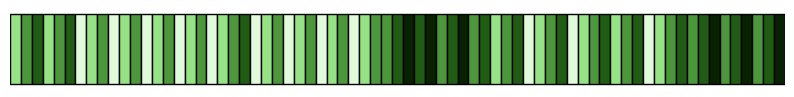

In [37]:
n = len(gts_ordered)

fig, ax = plt.subplots(figsize=(10, 1))

# Plot the stacked boxes
for i, time in enumerate(gts_ordered["timepoint"]):
    ax.barh(0, 1, left=i, color=time_palette[time], edgecolor='black')

# Adjust axes
ax.set_xlim(0, n)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)  # Hide the frame
plt.savefig(os.path.join(output_dir, "ordered_time_values.pdf"), bbox_inches="tight", dpi=300)



In [38]:
colors = ["#15889C", "#ED496F", "#8E1382", "#FFB300", "#FF6F00", "#43A047", "#C62828", "#2d62a3", "#1F7530", "#573794", "#28AAE1", "#870f0f", "#9e9e9e", "#795548", "#CD6155", "#F7DC6F", "#7DCEA0", "#85C1E9", "#EB984E", "#ead9d5", "#03cd4A", "#CDDC39", "#e0594b", "#c76cde", "#24B177", "#8D6E63", "#486ff7", "#6300b5", "#88e200", "#012824", "#0d3290", "#a347fb", "#54fc7a", "#eb1388", "#b0978d", "#fe52cf", "#83f1f6", "#f1f847", "#2b1dfc", "#6c6f15", "#6ca05c", "#7788cd", "#f502f3", "#0dc290", "#fa0e03", "#3caa0a", "#befc8d", "#08f8eb", "#b1cd3f", "#d6a5fa", "#ce606c", "#ab1eba", "#6ecc9f", "#054ddc", "#486ff7", "#854f49", "#f22B21", "#3a0e43", "#225805", "#37d160", "#e4b974", "#a8bade", "#47edd1", "#f47a92", "#c76cde", "#9106eb", "#81aa20", "#d7fdfd", "#5deb2e", "#f82745", "#6435e0", "#027ffe", "#8e3101", "#16f648", "#1c15bc", "#8be46e", "#8d6fa0", "#e68fc6", "#058ca9", "#9e018a", "#bdfd0b", "#b22760", "#2bf49f", "#cb9348", "#9d8303", "#c251a1", "#46adaf", "#a3e3af", "#22bb34", "#6ea3fa", "#260374", "#1c3854", "#405d37", "#c21df3", "#fcea92", "#537f88", "#fd4c18", "#f2d71e", "#fd4c7a"]

In [39]:
colors_red = colors[8:]

In [43]:
color_gene_target = {el: colors_red[i] for i, el in enumerate(gts_ordered["gene_target"].unique())}

In [44]:
color_gene_target

{'hand2_control': '#1F7530',
 'tbx1_control': '#573794',
 'smo_control': '#28AAE1',
 'tbx16_tbx16l': '#870f0f',
 'tbx16_control': '#9e9e9e',
 'tbx16_msgn1': '#795548',
 'noto_control': '#CD6155',
 'cdx4_cdx1a': '#F7DC6F',
 'cdx4_control': '#7DCEA0',
 'tbxta_control': '#85C1E9',
 'wnt3a_wnt8': '#EB984E',
 'met_control': '#ead9d5',
 'foxi1_control': '#03cd4A',
 'hgfa_control': '#CDDC39',
 'phox2a_control': '#e0594b',
 'zc4h2_control': '#c76cde',
 'egr2b_control': '#24B177',
 'epha4a_control': '#8D6E63',
 'hoxb1a_control': '#486ff7',
 'mafba_control': '#6300b5',
 'tfap2a_control': '#88e200',
 'foxd3_control': '#012824',
 'tfap2a_foxd3': '#0d3290'}

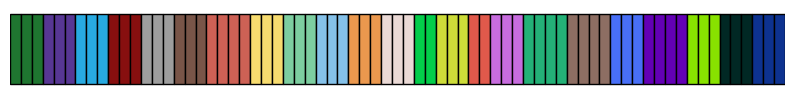

In [47]:
n = len(gts_ordered)

fig, ax = plt.subplots(figsize=(10, 1))

# Plot the stacked boxes
for i, target in enumerate(gts_ordered["gene_target"]):
    ax.barh(0, 1, left=i, color=color_gene_target[target], edgecolor='black')

# Adjust axes
ax.set_xlim(0, n)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)  # Hide the frame
plt.savefig(os.path.join(output_dir, "ordered_gene_targets.pdf"), bbox_inches="tight", dpi=300)



In [48]:
cts_ordered = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/cell_types_ordered.csv")


In [50]:
cts_ordered[cts_ordered["germ_layer"]=="mesoderm"]

,Unnamed: 0,CTs,germ_layer
0,0,osteoblast,mesoderm
1,1,myeloid cell,mesoderm
2,2,red blood cell,mesoderm
3,3,pronephros distal tubule,mesoderm
4,4,pronephros proximal tubule,mesoderm
5,5,jaw chondrocyte,mesoderm
6,6,slow-committed myocyte,mesoderm
7,7,fast-committed myocyte (fusing),mesoderm
8,8,fast-committed myocyte (pre-fusion),mesoderm
9,9,cranial muscle (mid),mesoderm


In [54]:
gts_ordered

,Unnamed: 0,gene_target,germ_layer,condition,timepoint
1,1,hand2_control,mesoderm,hand2_control_24,24
2,2,hand2_control,mesoderm,hand2_control_36,36
3,3,hand2_control,mesoderm,hand2_control_48,48
6,6,tbx1_control,mesoderm,tbx1_control_24,24
7,7,tbx1_control,mesoderm,tbx1_control_36,36
...,...,...,...,...,...
108,108,foxd3_control,neural_crest,foxd3_control_48,48
109,109,foxd3_control,neural_crest,foxd3_control_72,72
112,112,tfap2a_foxd3,neural_crest,tfap2a_foxd3_36,36
113,113,tfap2a_foxd3,neural_crest,tfap2a_foxd3_48,48


In [55]:
gts_ordered.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/gene_targets_ordered2.csv")

In [57]:
cts_ordered[cts_ordered["germ_layer"]=="mesoderm"]

,Unnamed: 0,CTs,germ_layer
0,0,osteoblast,mesoderm
1,1,myeloid cell,mesoderm
2,2,red blood cell,mesoderm
3,3,pronephros distal tubule,mesoderm
4,4,pronephros proximal tubule,mesoderm
5,5,jaw chondrocyte,mesoderm
6,6,slow-committed myocyte,mesoderm
7,7,fast-committed myocyte (fusing),mesoderm
8,8,fast-committed myocyte (pre-fusion),mesoderm
9,9,cranial muscle (mid),mesoderm


In [58]:
cts_ordered.loc[42]

Unnamed: 0          42
CTs              liver
germ_layer    endoderm
Name: 42, dtype: object

In [59]:
cts_ordered[cts_ordered["germ_layer"]=="endoderm"]

,Unnamed: 0,CTs,germ_layer
42,42,liver,endoderm
43,43,pancreas,endoderm
44,44,intestine,endoderm
45,45,thyroid follicle cell,endoderm
46,46,pharynx,endoderm
47,47,pronephric duct,endoderm
48,48,swim bladder primordium,endoderm
